# Vehicle Insurance Claim Fraud Detection
[Dataset on kaggle](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection)

### Contents
* Data understanding and EDA
* Data preprocessing 
* Modeling
* Evaluation

# Loading Dependencies

In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
sns.set()

# Loading Dataset

In [47]:
data = pd.read_csv('fraud_oracle.csv')

In [3]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


# Data Understanding

In [4]:
data.shape

(15420, 33)

In [5]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

# Visualize Numeric Data

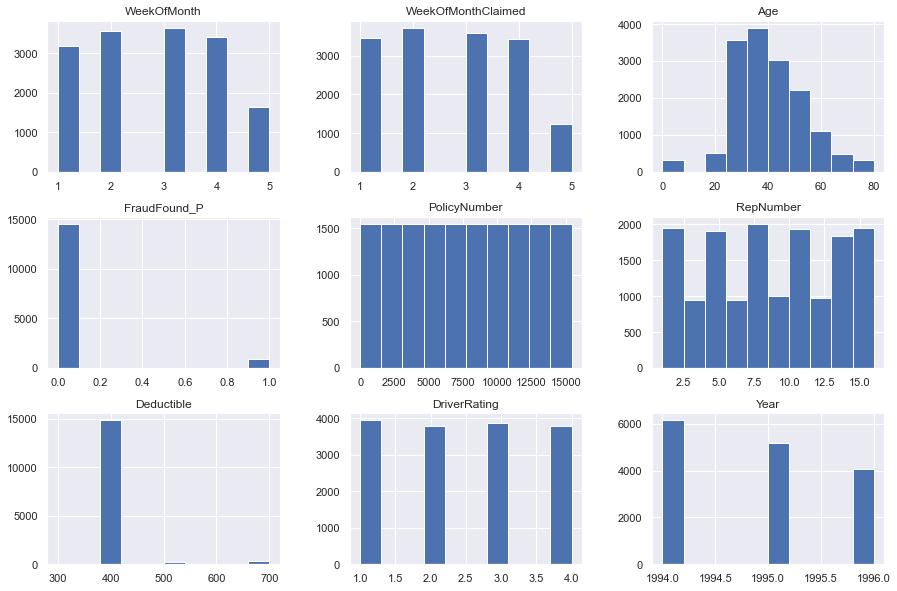

In [7]:
data.hist(figsize=(15, 10))
plt.show()

In [8]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [9]:
data.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [10]:
len(data[(data['Age'] == 0)])

320

In [11]:
len(data[(data['Age'] == 0) & (data['FraudFound_P'] == 1)])

31

In [12]:
len(data[data['FraudFound_P'] == 1])

923

In [13]:
len(data[data['FraudFound_P'] == 0])

14497

# Visualize Categorical Data

In [14]:
object_columns = ['Month', 'DayOfWeek', 'Make', 'AccidentArea',
                  'DayOfWeekClaimed', 'MonthClaimed', 'Sex',
                  'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory',
                  'VehiclePrice', 'Days_Policy_Accident',
                  'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
                  'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
                  'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']

len(object_columns)

24

In [15]:
def dist_graphs(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

## Bar Chart 

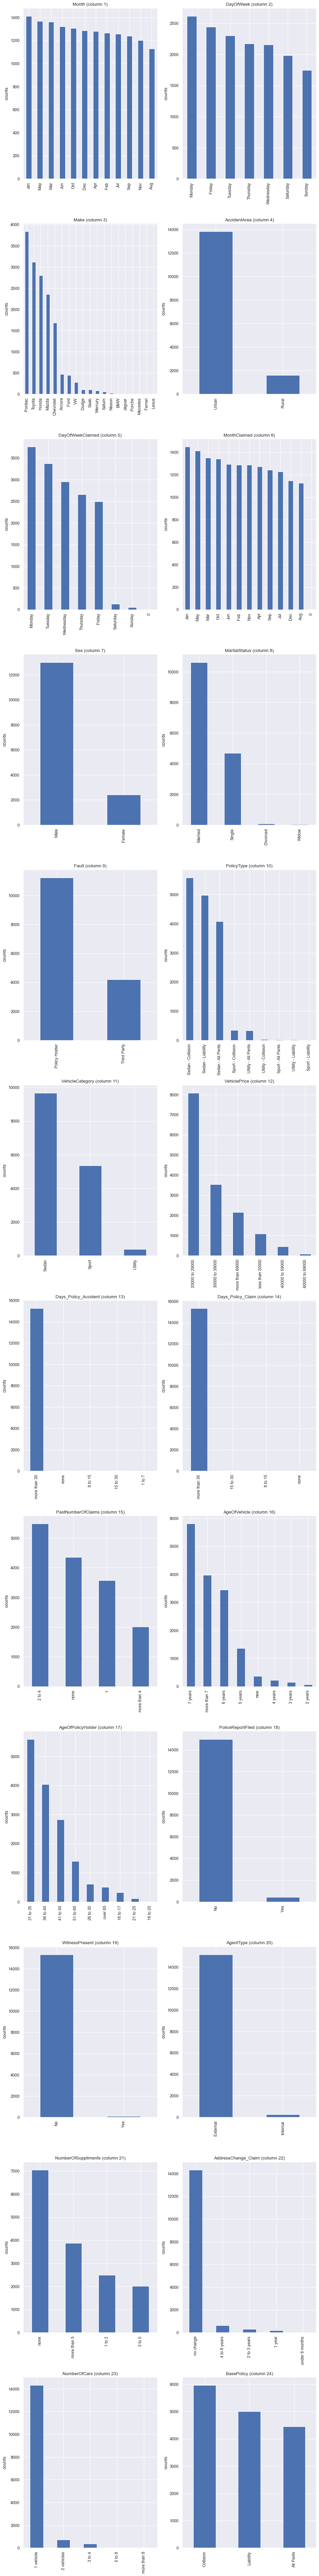

In [16]:
dist_graphs(data[object_columns], 24, 2)

In [17]:
def pie_graphs(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.pie(autopct = '%1.2f%%')
        else:
            columnDf.hist()
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

## Pie Chart

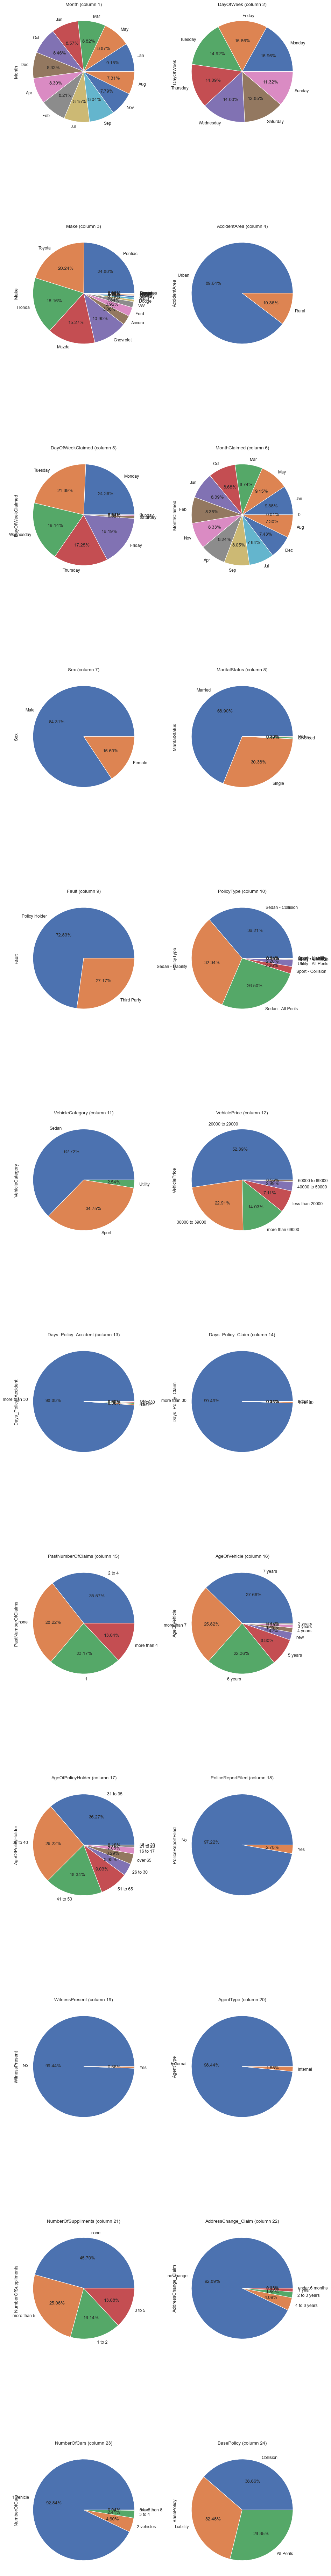

In [18]:
pie_graphs(data[object_columns], 24, 2)

## Correlation Matrix

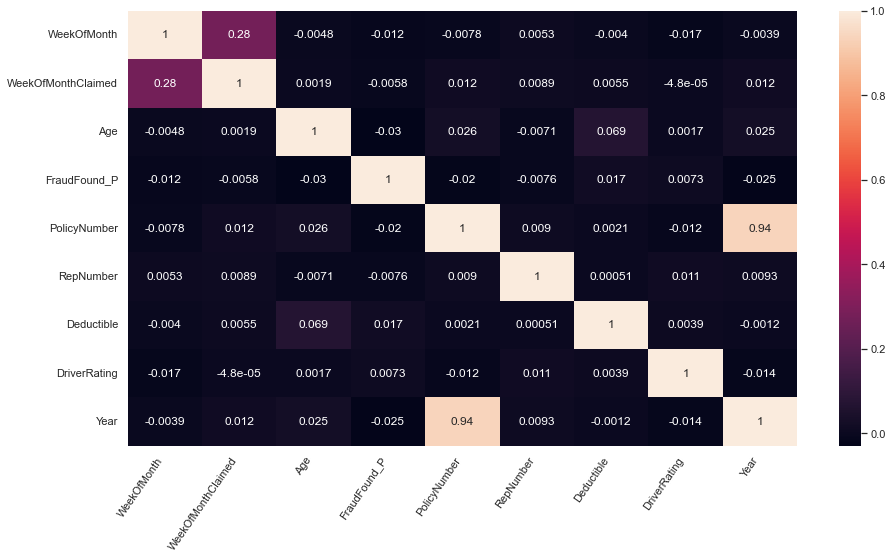

In [19]:
plt.figure(figsize=(15, 8))
dataplot = sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=55, horizontalalignment='right')
plt.show()

---
# Data Preprocessing
* Missing values
* Encoding
* Scaling

In [48]:
data.drop(['PolicyNumber', 'PolicyType'], axis=1, inplace=True)

In [49]:
data[(data['DayOfWeekClaimed'] == '0') | (data['MonthClaimed'] == '0')]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [50]:
data = data[(data['DayOfWeekClaimed'] != '0') & (data['MonthClaimed'] != '0')]

In [51]:
data.shape

(15419, 31)

## Encoding

In [52]:
data[['VehiclePrice']] = data[['VehiclePrice']].replace({
    'less than 20000' : 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000' : 4,
    'more than 69000' : 5})


data[['Days_Policy_Accident']] = data[['Days_Policy_Accident']].replace({
    'none' : 0,
    '1 to 7' : 1,
    '8 to 15' : 2,
    '15 to 30' :3,
    'more than 30' :4})


data[['Days_Policy_Claim']] = data[['Days_Policy_Claim']].replace({
    'none' : 0,
    '8 to 15' : 1,
    '15 to 30' : 2,
    'more than 30' : 3})


data[['PastNumberOfClaims']] = data[['PastNumberOfClaims']].replace({
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3})


data[['AgeOfVehicle']] = data[['AgeOfVehicle']].replace({
    'new' : 0,
    '2 years' : 1,
    '3 years' : 2,
    '4 years' : 3,
    '5 years' : 4, 
    '6 years' : 5,
    '7 years' : 6,      
    'more than 7' : 7})


data[['AgeOfPolicyHolder']] = data[['AgeOfPolicyHolder']].replace({
    '16 to 17' : 0,
    '18 to 20' : 1,  
    '21 to 25' : 2,
    '26 to 30' : 3,
    '31 to 35' : 4,
    '36 to 40' : 5,
    '41 to 50' : 6,
    '51 to 65' : 7, 
    'over 65' : 8})


data[['NumberOfSuppliments']] = data[['NumberOfSuppliments']].replace({
    'none' : 0,  
    '1 to 2' : 1,
    '3 to 5' : 2,
    'more than 5' : 3})


data[['AddressChange_Claim']] = data[['AddressChange_Claim']].replace({
    'no change' : 0,  
    'under 6 months' : 1,
    '1 year' : 2,
    '2 to 3 years' : 3, 
    '4 to 8 years' : 4})


data[['NumberOfCars']] = data[['NumberOfCars']].replace({
    '1 vehicle' : 0,  
    '2 vehicles' : 1,
    '3 to 4' : 2,
    '5 to 8' : 3, 
    'more than 8' : 4})

In [53]:
data = pd.get_dummies(data)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 96 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   WeekOfMonth                 15419 non-null  int64
 1   WeekOfMonthClaimed          15419 non-null  int64
 2   Age                         15419 non-null  int64
 3   VehiclePrice                15419 non-null  int64
 4   FraudFound_P                15419 non-null  int64
 5   RepNumber                   15419 non-null  int64
 6   Deductible                  15419 non-null  int64
 7   DriverRating                15419 non-null  int64
 8   Days_Policy_Accident        15419 non-null  int64
 9   Days_Policy_Claim           15419 non-null  int64
 10  PastNumberOfClaims          15419 non-null  int64
 11  AgeOfVehicle                15419 non-null  int64
 12  AgeOfPolicyHolder           15419 non-null  int64
 13  NumberOfSuppliments         15419 non-null  int64
 14  Addres

In [55]:
data.shape

(15419, 96)

## Missing values

In [56]:
from sklearn.impute import KNNImputer

In [57]:
data.loc[data['Age'] == 0, 'Age'] = np.nan

In [58]:
knn = KNNImputer(missing_values=np.nan, n_neighbors=3)

In [59]:
X = data.drop(['FraudFound_P'], axis=1).values

In [60]:
y = data['FraudFound_P'].values

In [61]:
knn = KNNImputer(missing_values=np.nan, n_neighbors=3)
X = knn.fit_transform(X)

## Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
ss = StandardScaler()
X = ss.fit_transform(X)

### Take a quick look

In [65]:
X.shape

(15419, 95)

In [66]:
y.shape

(15419,)

# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3243, test_size=0.2)

In [72]:
X_train.shape

(12335, 95)

In [106]:
(y_train == 1).sum()

743

In [74]:
X_test.shape

(3084, 95)

In [105]:
(y_test == 1).sum()

180

---
# Modeling and Evaluation

In [153]:
sns.set(font_scale=2)

In [131]:
def evaluation(y, y_pred):
    print(metrics.classification_report(y, y_pred))
    df = pd.DataFrame(metrics.confusion_matrix(y, y_pred), index=[i for i in '01'], columns=[i for i in '01'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(df, annot=True, annot_kws={"size": 25})
    plt.show()


## 1. Logistic Regression Classifier

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
lr = LogisticRegression(random_state=2020)

In [135]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=2020)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2904
           1       0.00      0.00      0.00       180

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.89      0.94      0.91      3084



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


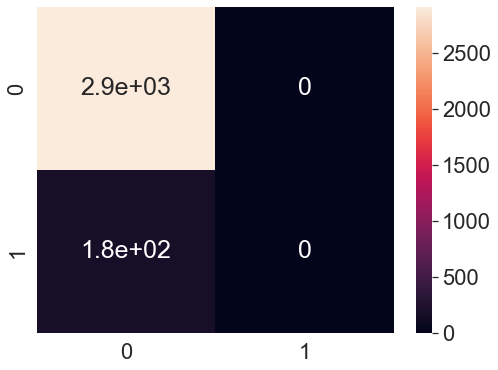

In [136]:
evaluation(y_test, lr.predict(X_test))

### Random Undersampling

In [137]:
rus = RandomUnderSampler(random_state=20)

In [138]:
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [139]:
X_rus.shape

(1486, 95)

In [140]:
lr = LogisticRegression(random_state=2021)

In [141]:
lr.fit(X_rus, y_rus)

LogisticRegression(random_state=2021)

              precision    recall  f1-score   support

           0       0.98      0.65      0.78      2904
           1       0.12      0.78      0.21       180

    accuracy                           0.66      3084
   macro avg       0.55      0.72      0.50      3084
weighted avg       0.93      0.66      0.75      3084



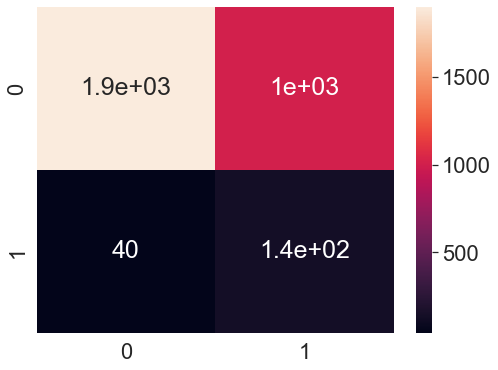

In [142]:
evaluation(y_test, lr.predict(X_test))

### Random Oversampling

In [144]:
ros = RandomOverSampler(random_state=40)

In [147]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [148]:
X_ros.shape

(23184, 95)

In [149]:
lr = LogisticRegression(random_state=2021)

In [150]:
lr.fit(X_ros, y_ros)

LogisticRegression(random_state=2021)

              precision    recall  f1-score   support

           0       0.98      0.64      0.78      2904
           1       0.12      0.79      0.21       180

    accuracy                           0.65      3084
   macro avg       0.55      0.72      0.49      3084
weighted avg       0.93      0.65      0.74      3084



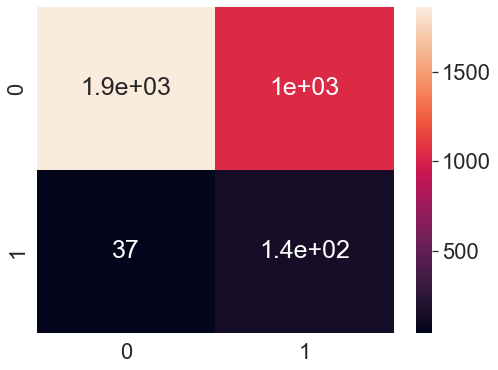

In [151]:
evaluation(y_test, lr.predict(X_test))

### Class Weight

Best parameters : {'class_weight': {0: 0.1131578947368421, 1: 0.8868421052631579}}


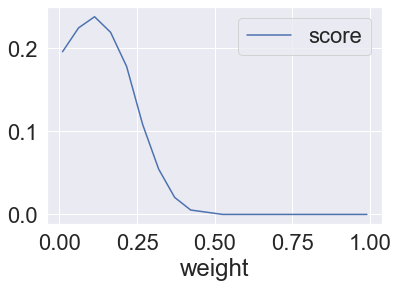

In [162]:
weights = np.linspace(0.01, 0.99, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, y_train)
print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')
plt.show()

In [163]:
lr = LogisticRegression(random_state=2022, **grid_result.best_params_)

In [164]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.1131578947368421, 1: 0.8868421052631579},
                   random_state=2022)

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2904
           1       0.15      0.55      0.23       180

    accuracy                           0.79      3084
   macro avg       0.56      0.68      0.56      3084
weighted avg       0.92      0.79      0.84      3084



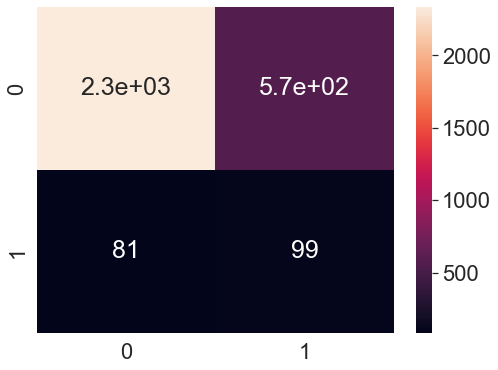

In [165]:
evaluation(y_test, lr.predict(X_test))

### Support Vector Machine

In [166]:
from sklearn.svm import SVC

In [182]:
svc = SVC(**grid_result.best_params_, C=2)

In [183]:
svc.fit(X_train, y_train)

SVC(C=2, class_weight={0: 0.1131578947368421, 1: 0.8868421052631579})

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2904
           1       0.18      0.51      0.27       180

    accuracy                           0.84      3084
   macro avg       0.57      0.68      0.59      3084
weighted avg       0.92      0.84      0.87      3084



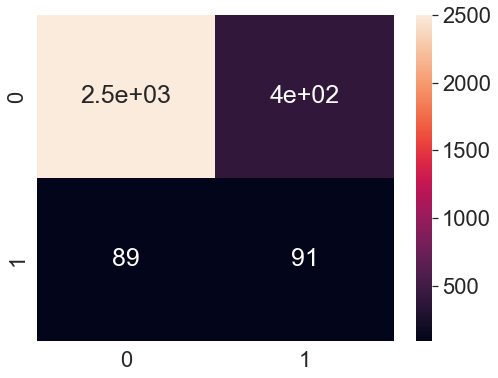

In [184]:
evaluation(y_test, svc.predict(X_test))

### KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn = KNeighborsClassifier(n_neighbors=1)

In [190]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2904
           1       0.15      0.14      0.15       180

    accuracy                           0.90      3084
   macro avg       0.55      0.55      0.55      3084
weighted avg       0.90      0.90      0.90      3084



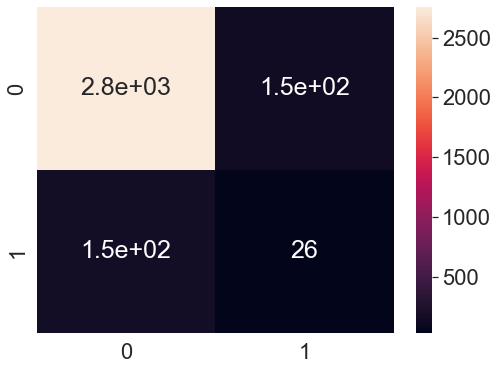

In [191]:
evaluation(y_test, knn.predict(X_test))

In [192]:
ros = RandomOverSampler()

In [193]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [209]:
knn = KNeighborsClassifier(n_neighbors=3)

In [210]:
knn.fit(X_ros, y_ros)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2904
           1       0.12      0.23      0.16       180

    accuracy                           0.86      3084
   macro avg       0.54      0.56      0.54      3084
weighted avg       0.90      0.86      0.88      3084



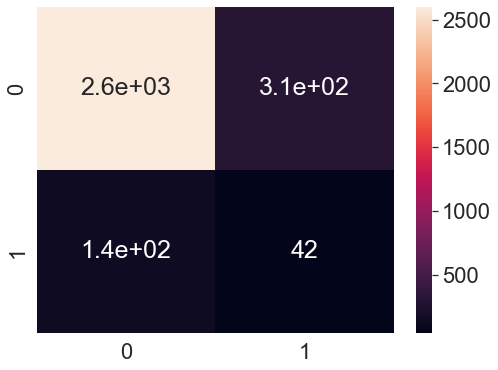

In [211]:
evaluation(y_test, knn.predict(X_test))

### Decision Tree

In [212]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
tree = DecisionTreeClassifier()

In [215]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2904
           1       0.16      0.21      0.18       180

    accuracy                           0.89      3084
   macro avg       0.55      0.57      0.56      3084
weighted avg       0.90      0.89      0.90      3084



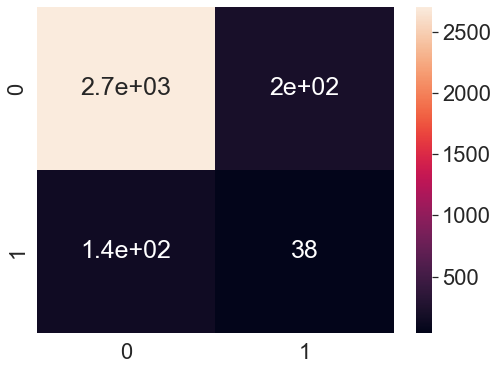

In [216]:
evaluation(y_test, tree.predict(X_test))

In [217]:
tree = DecisionTreeClassifier(**grid_result.best_params_)

In [218]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1131578947368421,
                                     1: 0.8868421052631579})

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2904
           1       0.15      0.17      0.16       180

    accuracy                           0.90      3084
   macro avg       0.55      0.55      0.55      3084
weighted avg       0.90      0.90      0.90      3084



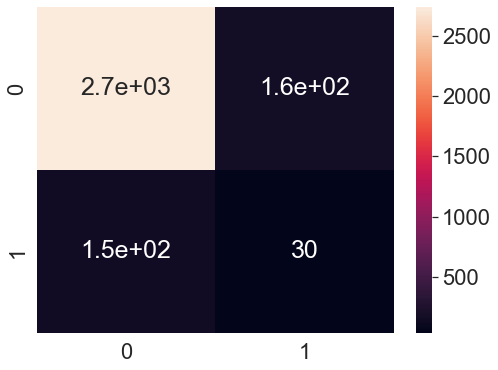

In [219]:
evaluation(y_test, tree.predict(X_test))

In [220]:
ros = RandomOverSampler(random_state=15)

In [221]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [225]:
tree = DecisionTreeClassifier()

In [226]:
tree.fit(X_ros, y_ros)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2904
           1       0.20      0.20      0.20       180

    accuracy                           0.91      3084
   macro avg       0.57      0.57      0.57      3084
weighted avg       0.91      0.91      0.91      3084



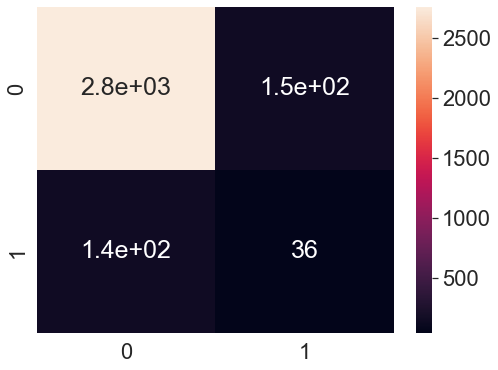

In [227]:
evaluation(y_test, tree.predict(X_test))

### Random Forest

In [228]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
rf = RandomForestClassifier()

In [239]:
rf.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2904
           1       0.67      0.01      0.02       180

    accuracy                           0.94      3084
   macro avg       0.80      0.51      0.50      3084
weighted avg       0.93      0.94      0.91      3084



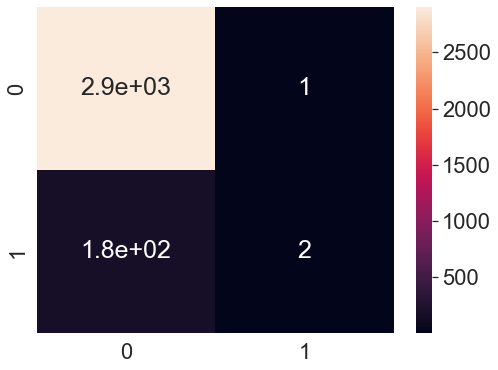

In [240]:
evaluation(y_test, rf.predict(X_test))

In [241]:
ros = RandomOverSampler(random_state=15)

In [242]:
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [243]:
rf = RandomForestClassifier()

In [244]:
rf.fit(X_ros, y_ros)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2904
           1       0.57      0.02      0.04       180

    accuracy                           0.94      3084
   macro avg       0.76      0.51      0.51      3084
weighted avg       0.92      0.94      0.92      3084



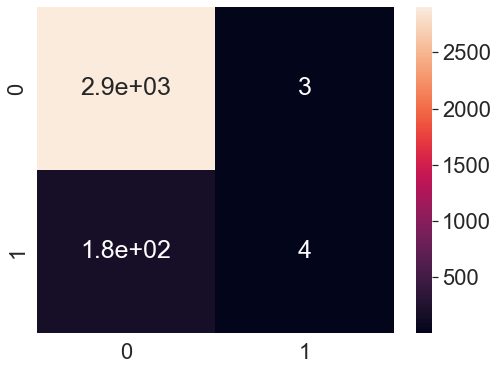

In [245]:
evaluation(y_test, rf.predict(X_test))